In [2]:
from Functions import *
from Kernels import *
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
import plotly.graph_objects as go


# 1D functions

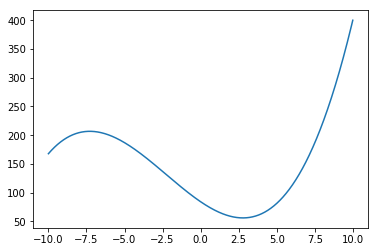

In [12]:
X = np.linspace(-10, 10, 1000)
inp = np.array([X])

out = (inp[0]/1.5)**3 + (inp[0] - 8)**2 + (inp[0] + 4)**2 + (-inp[0]*10 + 4)

plt.plot(X, out)
plt.show()


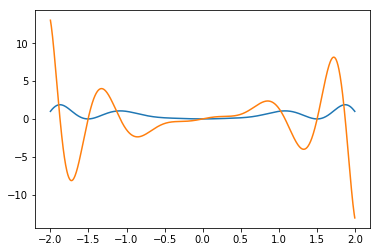

In [5]:
X = np.linspace(-2, 2, 1000)
inp = np.array([X])

out = one_D_shallow(inp)
out_grad = grad_one_D_shallow(inp)

plt.plot(X, out)
plt.plot(X, out_grad[0])
plt.show()


# 2D functions

In [27]:
def multi_gaussian(cov):
    def multi_gaussian_helper(inp, mu):
        """same mu for every datapoint given in ipn"""
        k = inp.shape[0]
        diff = (inp.T - mu).T        
        return 1 / np.sqrt(pow(2 * np.pi, k) * np.linalg.det(cov)) * np.exp(
            -0.5 * np.sum(diff*(np.linalg.inv(cov).dot(diff)), axis=0))
    return multi_gaussian_helper

In [9]:
def himmelblau_2d(inp):
    x = inp[0]
    y = inp[1]
    return (x**2 + y - 11)**2 + (x + y**2 - 11)**2

In [10]:
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)

inp = np.array(np.meshgrid(X, Y)).reshape(2, len(X)*len(Y))

out = himmelblau_2d(inp)

out = out.reshape(len(X), len(Y))

In [11]:
fig = go.Figure(data=[go.Surface(z=out, x=X, y=Y, colorscale="Viridis")])

fig.update_layout(title='Function', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()